## Stability - using barycentric interpolation

In [258]:
using CairoMakie

# Barycentric interpolation and background information

The barycentric formula is:
```math
```

# Basis - ```j_eval_cheby2``` and ```j_eval``` functions

For interpolation points/nodes, $x_j$, and some new points $x_i$, that you want to find $f(x_i)$. The ```j_eval_cheby2``` and ```j_eval``` functions are used to find the matrix 
```math
E_{ij}=\ell_j(x_i)
```
such that 
```math
\textbf{f}(\textbf{x}_i)=\frac{E *\textbf{f}}{E *\mathbf{1}}
```
The formula the function ```j_eval``` uses for $\ell_j(x)$ is:
```math
\ell_j(x)=\frac{\frac{w_j}{x-x_j}}{\sum_{k=0}^{n} \frac{w_k}{x-x_k}}
```
The ```j_eval_cheby2``` function only uses $x_j$ values of Chebyshev points of the second kind, whose formula are:

```math
x_j=\cos \frac{j \pi}{n}, j=0,...,n

```
They have the explicit weight formula: 
```math
w_j=(-1)^j \delta_j,
\delta_j=
\begin{cases}
\frac{1}{2}, & \text{j=0 or j=n}\\
1, & \text{otherwise}
\end{cases}
```
So the function ```j_eval_cheby2``` finds the matrix $E$ for nodes that are Chebyshev points of the 2nd kind and only take points $x_j$ that are in this form.

The  ```j_eval``` function finds the matrix $E$ but does so for any points given by the user by finding the weights given the interpolation points $x_j$.

We'll try with using a function $f(x)=\cos(x)$, where we want the value of $\cos(0.5)$ and $\cos(0.75)$ (our $x_i$ are 0.5 and 0.75)

We'll first demonstrate with use the function ```j_eval_chevy2```:

In [259]:
include("j_eval_cheby2.jl")
n=200 #so we have 201 interpolation/Chebyshev points
xjvals=cos.(pi*(0:n)'/n)[:] #interpolation points in the form of chebyshev points of the 2nd kind
xivals=[0.5,0.75] #points you want to evaluate at
fvec=cos.(xjvals)[:]#fj values 
vec1=repeat([1],n+1)

emat=j_eval_cheby2(xjvals,xivals) #E matrix of lj(xi) components
fxivals=(emat*fvec)./(emat*vec1) #uses barycentric interpolation formula to find p(xivals)

2-element Vector{Float64}:
 0.8775825618903724
 0.7316888688738205

Now we'll demonstrate with the use of function ```j_eval```:

In [260]:
include("j_eval.jl")
emat2=j_eval(xjvals,xivals) #E matrix of lj(xi) components
fxivals2=(emat2*fvec)#./(emat2*vec1)

2-element Vector{Float64}:
 0.8775825618903724
 0.7316888688738207

In [261]:
#fxivals3=emat2*fvec

In [262]:
#To check my function works we'll find the true value of f(xivals)
cos.([0.5,0.75])

2-element Vector{Float64}:
 0.8775825618903728
 0.7316888688738209

Another example:
```math
f(x)=|x|+\frac{x}{2} -x^2
```

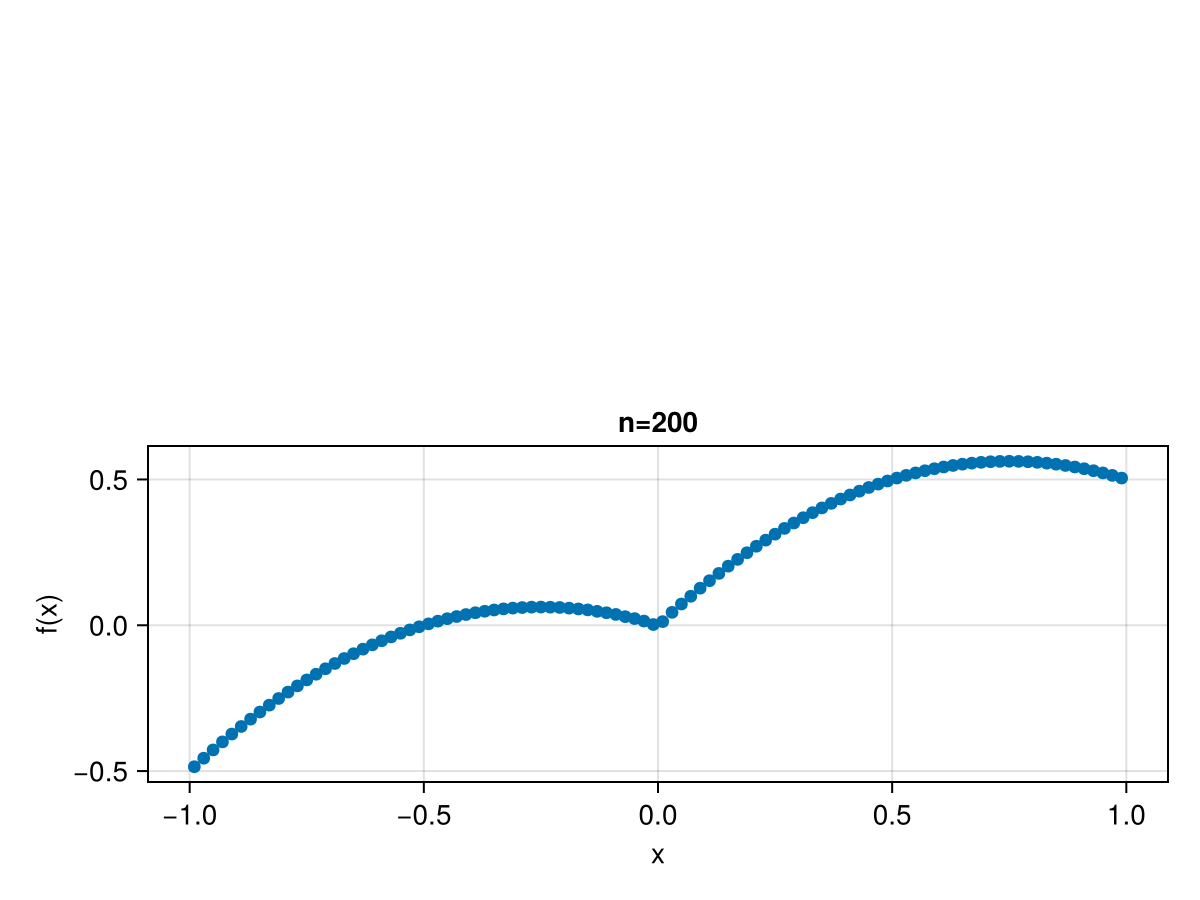

In [263]:
include("binter_example.jl")
xivals2=[-0.99:0.02:0.99;]
fvec2=binter_example(xjvals) #(xivals2)

emat3=j_eval_cheby2(xjvals,xivals2) #E matrix of lj(xi) components
fxivals3=(emat3*fvec2)./(emat3*vec1)

fig1=Figure()
ax1=Axis(fig1[2,1],xlabel="x",ylabel="f(x)",title="n=200") #Axis(fig1[1,1],xlabel="x",ylabel="f(x)",title="n=200")
scatter!(ax1,xivals2,fxivals3)
fig1


In [264]:
#emat3
fxivals3

100-element Vector{Float64}:
 -0.4851001877396717
 -0.455908991937141
 -0.4274918825266798
 -0.3999018812895803
 -0.3731112412231863
 -0.3470913872672765
 -0.32188829792717844
 -0.2975205606138642
 -0.27392279205209513
 -0.2511093419902461
  ⋮
  0.5560772079479053
  0.5524794393861359
  0.5481117020728212
  0.5429086127327235
  0.5368887587768139
  0.5300981187104198
  0.5225081174733198
  0.5140910080628588
  0.5048998122603281

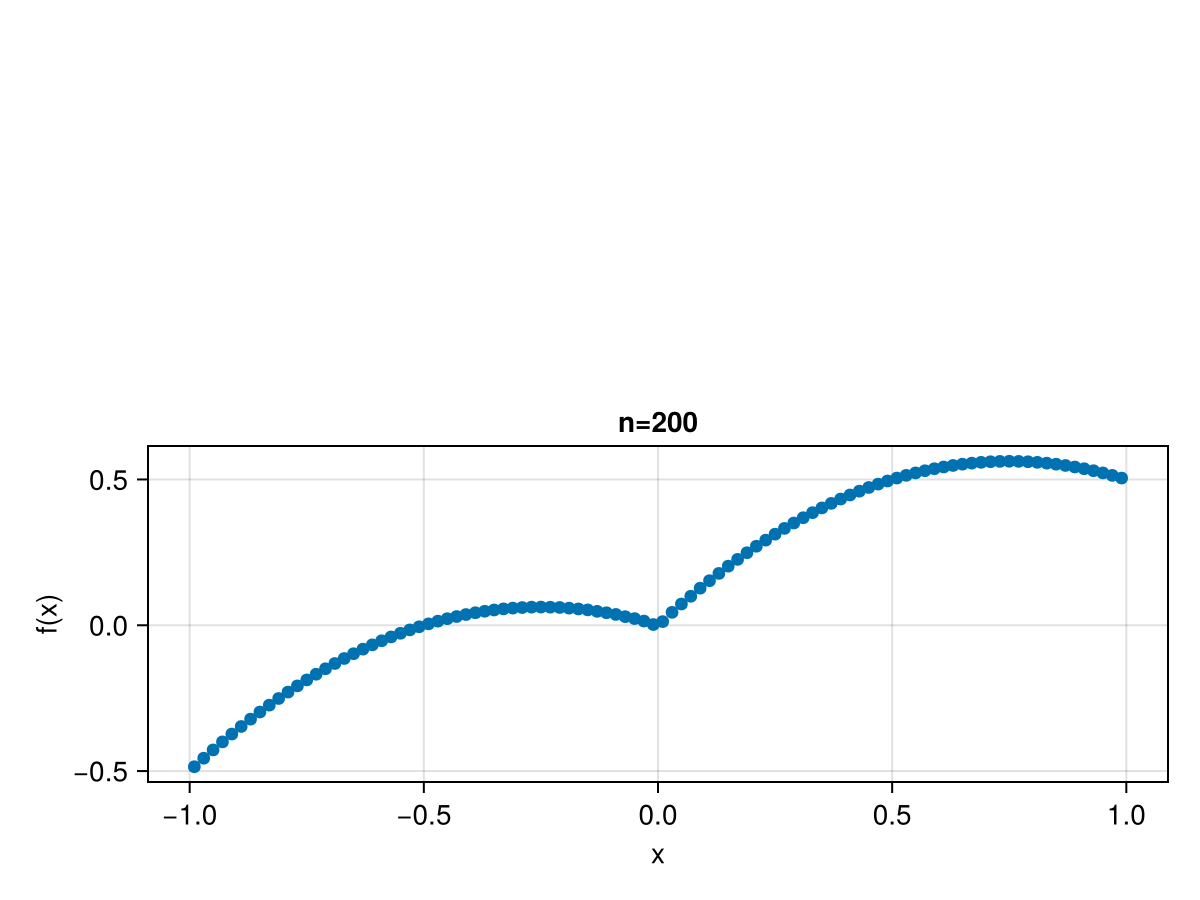

In [265]:
emat4=j_eval(xjvals,xivals2) #E matrix of lj(xi) components
fxivals4=(emat4*fvec2)#./(emat4*vec1)

fig2=Figure()
ax2=Axis(fig2[2,1],xlabel="x",ylabel="f(x)",title="n=200") #Axis(fig1[1,1],xlabel="x",ylabel="f(x)",title="n=200")
scatter!(ax2,xivals2,fxivals4)
fig2


# 2D barycentric interpolation

For now (18.08.2025), we're looking at Chebyshev points of the 2nd kind. Say we have a structured grid, for example in 2D:
```math
\begin{align*}
x_i &= \cos(\frac{\pi i}{n_x}) & \text{for i=0,..., $n_x$}\\
y_j &=\cos(\frac{\pi j}{n_y}) & \text{for j=0,..., $n_y$}
\end{align*}
```
And let $f_{ij}=f(x_i,y_j)$ be the function value at $(x_i,y_j)$  - i.e. $f_{ij}=f(x_i,y_j)$. Next we compute the weights $w_i^{(x)}$ for $x_i$ and the weights $w_j^{(y)}$ for $y_j$. The interpolant at a point $(x,y)$ is:
```math
p(x,y)=\frac{\sum_{i=0}^{n_x} \sum_{j=0}^{n_y} \frac{w_i^{(x)}}{x-x_i} \cdot \frac{w_j^{(y)}}{y-y_j} \cdot f_{ij}}{\sum_{i=0}^{n_x} \frac{w_i^{(x)}}{x-x_i} \cdot \sum_{j=0}^{n_y} \frac{w_j^{(y)}}{y-y_j}}
```
For ease, we assume $n_x=n_y=n$ and the function ```j_eval_multidim``` uses the following algorithm to compute $p(x,y)$ on a structured grid:
1. For each new $y$ we wish to evaluate at, we fix the $y$ and for each $i$, interpolate in the $y$-direction to get:
```math
g_i(y)=\frac{\sum_{j=0}^{n} \frac{w_j^{(y)}}{y-y_j}f_{ij}}{\sum_{j=0}^{n}\frac{w_j^{(y)}}{y-y_j}}
``` 
2. Then the function interpolates in $x$:
```math
p(x,y)=\frac{\sum_{i=0}^{n} \frac{w_i^{(x)}}{x-x_i}g_i(y)}{\sum_{i=0}^{n} \frac{w_i^{(x)}}{x-x_i}}
```
Note the above algorithm can be generalised to 3+ dimensions by interpolating along one axis at a time.


In [266]:
#for basic functio f(x,y)=x+y, where we want to find f(0.25,2)
include("j_eval_multidim.jl")
fmat1=[2 1 0; 1 0 -1; 0 -1 -2]
j_eval_multidim([[1,1],[0,0],[-1.0,-1]],[[0.25,2]],fmat1)

1-element Vector{Float64}:
 2.2500000000000004

In [267]:
#check it against true answer
include("basic_func.jl")
true_ans=basic_func(0.25,2)

2.25

# Differentiating

In [268]:
include("j_eval.jl")
n=200 #so we have 201 interpolation/Chebyshev points

diffmat=j_eval(xjvals,xivals,diff=1) #E matrix of lj(xi) components
dfxivals=diffmat*fvec#uses barycentric interpolation formula to find p(xivals)
dfxivals[1:5]

5-element Vector{Float64}:
 -0.8414709848076489
 -0.8414043226496261
 -0.8412042758051776
 -0.8408706633084314
 -0.8404031840599911

In [269]:
#Compare the above to the true values of f'(x_j) -> remember x_j are the interpolation points
diff_exact=-sin.(xjvals)[1:5]

5-element Vector{Float64}:
 -0.8414709848078965
 -0.841404322650035
 -0.8412042758047135
 -0.8408706633083012
 -0.8404031840598705

In [270]:
diff2mat=j_eval(xjvals,xivals,diff=2) #E matrix of lj(xi) components
df2xivals=diff2mat*fvec#uses barycentric interpolation formula to find p(xivals)
df2xivals[1:5] #would expect them to be -ve fvec

5-element Vector{Float64}:
 -44878.473201488654
   6820.426465186807
   1704.8964773449432
    757.5763803684644
    426.01466669450417

Now trialling 1st derivative function part of $f(x)=|x|+\frac{x}{2}-x^2$:

In [271]:
#For f(x)=|x|+0.5x-x^2
diffx=(j_eval(xjvals,[0.5],diff=1)*fvec2)[1:5]

5-element Vector{Float64}:
 -0.5157063488458179
 -0.4918991218338676
 -0.5068701711769545
 -0.48991784996389864
 -0.5039221545231595

In [272]:
diffx=(j_eval(xjvals,[0.5],diff=1)*fvec2)[1:5]

5-element Vector{Float64}:
 -0.5157063488458179
 -0.4918991218338676
 -0.5068701711769545
 -0.48991784996389864
 -0.5039221545231595

In [273]:
diff2=(j_eval(xjvals,[0.5],diff=2)*fvec2)[1:5]

5-element Vector{Float64}:
 -27083.87260969328
   4020.86616036464
   1020.9894343056176
    446.6273926845504
    255.11412374146855

# Stability using barycentric interpolation

In [279]:
using LinearAlgebra
#For m=1
taumaxtrial1=1 #trial 1 with a delay of tau=1 
#for more than one delay, take tau max to be largest delay 
N=10
tjvals=reverse((-taumaxtrial1/2)*(cos.(pi*(0:N)'/N)[:].+1))
ljvals=j_eval(tjvals,[0,-taumaxtrial1])
#tjvals2=(-2/2)*(cos.(pi*(0:N)'/N)[:].+1)
Dtrial1=j_eval(tjvals,[0,-taumaxtrial1],diff=1)
stabmatrixAtrial1=fill(NaN,N+1,N+1)
stabmatrixAtrial1[2:end,:]=Dtrial1[2:end,:]

a=2
b=exp(1) #b=e

#stabmatrixAtrial1[1,:]=a*(ljvals[1,:])+b*(ljvals[2,:])
for j in 1:N+1
    stabmatrixAtrial1[1,j]=a*(ljvals[1,j])+b*(ljvals[2,j])
end 
eigvals(stabmatrixAtrial1) #doesn't match that given in Breda source

11-element Vector{ComplexF64}:
 -23.185760980826743 - 12.259944263586952im
 -23.185760980826743 + 12.259944263586952im
  -5.884891262284991 - 20.7371415461934im
  -5.884891262284991 + 20.7371415461934im
  -2.575452956702816 - 17.1633286633441im
  -2.575452956702816 + 17.1633286633441im
 -1.4048098436244374 - 10.686268035104519im
 -1.4048098436244374 + 10.686268035104519im
 -0.5883172279567646 - 4.155304706787289im
 -0.5883172279567646 + 4.155304706787289im
  2.2784645427915486 + 0.0im

In [280]:
###For m=2 with 2 delays tau1 and tau2
m=2
Id2=Matrix{Float64}(I,2,2)

tau1=0.2
tau2=0.3
taumaxtrial2=0.3
N2=14

tjvals2=reverse((-taumaxtrial2/2)*(cos.(pi*(0:N2)'/N2)[:].+1))
ljvals2=j_eval(tjvals2,[0,-tau1,-tau2])f
Dtrial2=j_eval(tjvals2,[0,-taumaxtrial2],diff=1)
stabmatrixAtrial2=fill(NaN,m*(N2+1),m*(N2+1))
mD2mat=fill(NaN,m*N2,m*(N2+1))
for i in 2:N2+1
    for j in 1:N2+1
        mD2mat[2*i-3:2*i-2,2*j-1:2*j]=Id2*Dtrial2[i,j]
    end 
end 

stabmatrixAtrial2[m+1:end,1:end]=mD2mat

M1=[-6.45 -12.1; 1.5 -0.45]
M2=[-6 0; 1 0]
M3=[0 4; 0 -2]

for j in 1:N2+1
    stabmatrixAtrial2[1:m,2*j-1:2*j]=M1*(ljvals2[1,j]*Id2)+M2*(ljvals2[2,j]*Id2)+M3*(ljvals2[3,j]*Id2) #indices would change for different m (m!=0)
end 

eigvals(stabmatrixAtrial2) #rightmost eigenvalue matches the one in Breda source!!!

30-element Vector{ComplexF64}:
 -125.55396986482523 + 0.0im
  -79.83209089129548 - 77.32512676216008im
  -79.83209089129548 + 77.32512676216008im
  -65.43342929419491 + 0.0im
  -61.55778707889961 - 24.569767314589292im
  -61.55778707889961 + 24.569767314589292im
 -49.034877932505765 - 48.30752547082575im
 -49.034877932505765 + 48.30752547082575im
 -26.736973488773287 - 118.65873866588186im
 -26.736973488773287 + 118.65873866588186im
                     ⋮
 -10.400919541541283 + 38.92741649498601im
  -9.900527931335066 - 69.86917824530187im
  -9.900527931335066 + 69.86917824530187im
  -9.345070452991889 - 25.570711320019164im
  -9.345070452991889 + 25.570711320019164im
 -5.0567792803906695 - 4.026235533850058im
 -5.0567792803906695 + 4.026235533850058im
 -1.3352684760607727 - 9.119483347402427im
 -1.3352684760607727 + 9.119483347402427im

The function ```stab_func_bi``` uses barycentric interpolation to find the stability and the rightmost eigenvalue of an equilibrium point. Below is an example for a delay differential equation system that models the interaction between two neurons. A more indepth look at this system can be found in the Neuron_example demo but it's system is given by:
```math
\begin{align}
  \dot{x}_1&= -\kappa x_1(t) + \beta \tanh(x_1(t-\tau_s)) + a_{12} \tanh(x_2(t-\tau_2))\\
  \dot{x}_2&=-\kappa x_2(t) + \beta \tanh(x_2(t-\tau_s)) + a_{21} \tanh(x_2(t-\tau_1))
\end{align}
```

In [290]:
using LinearAlgebra
#Use these when notebook not in its own folder
include("Neuron_demo/neuronfunc.jl") #system of neuron example
include("Neuron_demo/neurontau.jl") #Delay forumla for neuron example
include("shared/f_deriv.jl") #used to find state and/or parameter derivatives
include("shared/jacobian_new.jl") #Jacobian function
include("shared/newton_new.jl") #Newton function
include("shared/create_ststfunc.jl") #Initialisates a function to find equilibria 
include("shared/track_curve_new.jl") #Tracking curve function (used for continuation and equilibria branches)
include("shared/create_hopffunc.jl")#finds initial guess for Hopf information and creates a function that can find the true Hopf values
include("stab_func_bi.jl")#finds stability and rightmost eigenvalue using barycentric interpolation

#USe the ones below when you have moved this notebook into its own folder
#include("../Neuron_demo/neuronfunc.jl") #system of neuron example
#include("../Neuron_demo/neurontau.jl") #Delay forumla for neuron example
#include("../shared/f_deriv.jl") #used to find state and/or parameter derivatives
#include("../shared/jacobian_new.jl") #Jacobian function
#include("../shared/newton_new.jl") #Newton function
#include("../shared/create_ststfunc.jl") #Initialisates a function to find equilibria 
#include("../shared/track_curve_new.jl") #Tracking curve function (used for continuation and equilibria branches)
#include("../shared/create_hopffunc.jl")#finds initial guess for Hopf information and creates a function that can find the true Hopf values
#include("../shared/stab_func_bi.jl")#finds stability and rightmost eigenvalue using barycentric interpolation

stab_func_bi (generic function with 1 method)

In [291]:
#Values of parameters (same as those given in the neuron demo for DDE-Biftool)
k=0.5
beta=-1
a12=1
a21=2.34 
tau1=0.2
tau2=0.2
taus=1.5

nd=3 #there are 3 delays
y0,feq=create_ststfunc(neuronfunc,[0.0,0],[k,beta,a12,0,tau1,tau2,taus], nd, par_indx=4) #we set a21 to 0 and finding starting point for equilibria branching
alist1,ytan1=track_curve_new(feq,y0,[0.0,0,1],nmax=550)#tracks equilibria to give equilibria branch

xmat1=hcat([u[1] for u in alist1],[u[2] for u in alist1]); #finds the values of x1 and x2 for the equilibria
xlist1=[xmat1[i,:] for i in 1:size(xmat1,1)];#creates a vector of vectors of all the equilibria points


plist1=[u[3] for u in alist1]; #A vector of the values of a21 for the equilibria points


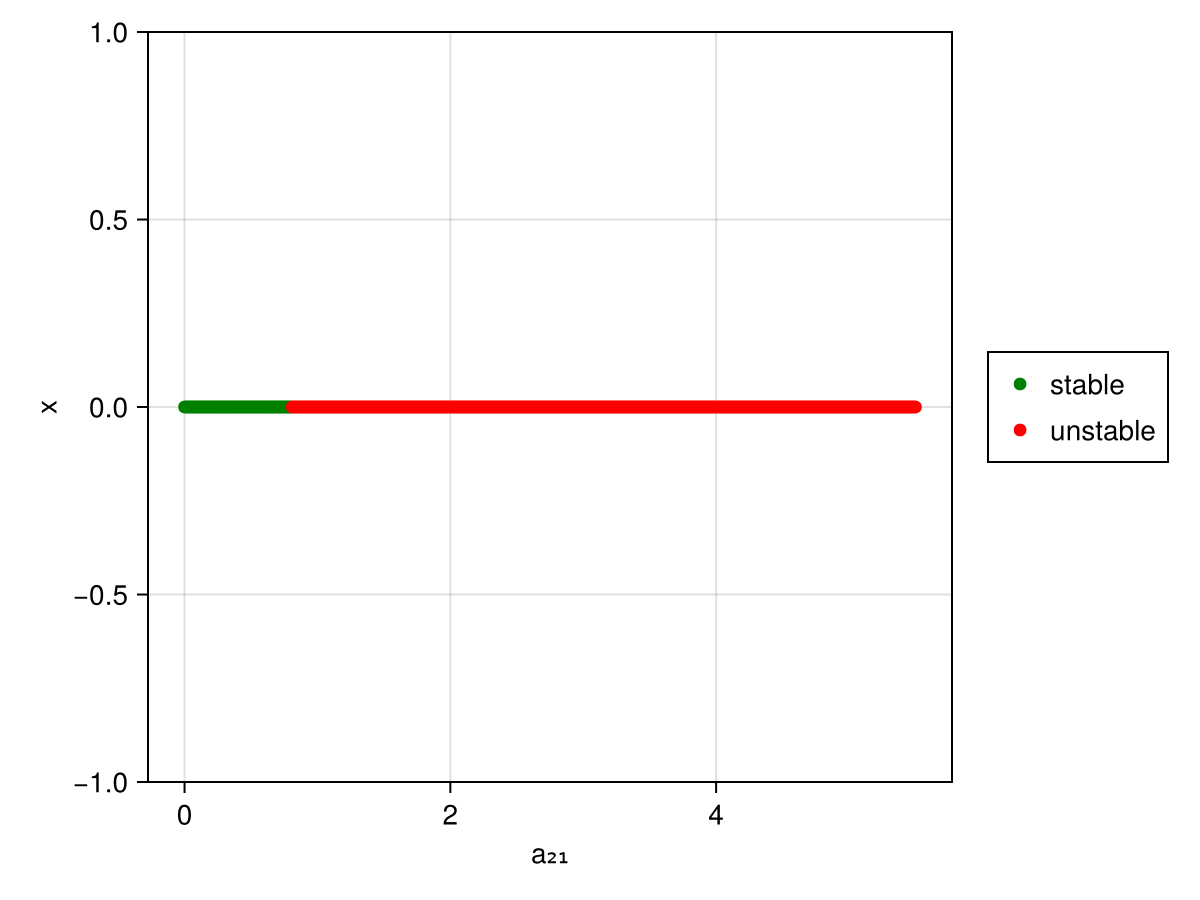

In [ ]:
neq=length(plist1) #number of equilibrium points we're finding the stability of
stab=fill(NaN,neq)
lamr1=fill(0.0+0.0*im,neq)

for i in 1:neq
    stab[i],lamr1[i],=stab_func_bi(neuronfunc,neurontau,[k,beta,a12,plist1[i],tau1,tau2,taus],xlist1[i],3,10) #outputs the stability (1 for stable, 0 for unstable) and also gives the rightmost eigenvalue for each equilibrium point
end

stable=(stab.==1.0) #highlights indices of stable points (indicated by a 1 in stable vector)
unstable=(stab.==0.0)#highlights indices of unstable points (indicated by a 1 in unstable vector)

#Below plots the equilibria and shows their stability
fig1=Figure()
ax1=Axis(fig1[1,1],xlabel="a₂₁",ylabel="x")
scatter!(ax1,plist1[stable],[u[1] for u in xlist1[stable]],label="stable",color="green")
scatter!(ax1,plist1[unstable],[u[1] for u in xlist1[unstable]],label="unstable",color="red")
Legend(fig1[1,2], ax1, merge=true)
fig1

In [293]:
unstab_indx=findfirst(isequal(0.0),stab) #finds index of Hopf bifurcation
a21unstab=plist1[unstab_indx] #finds initial guess for parameter a21 value for a Hopf bifurcation

0.8100000000000005

In [ ]:
#create_hopffunc uses stab_func (old stability function - need to amend this)
yh01,fhopf=create_hopffunc(neuronfunc,neurontau,[k,beta,a12,0,tau1,tau2,taus],xlist1[unstab_indx],[a21unstab],[4],3) #outputs initial guess of the Hopf bifurcation (including x, ω and a21 estimates) and a function that contians the method/formula to find the Hopf bifurcation
println("The initial guess for Hopf info: $yh01")
println("The initial guess for Hopf info: $yh01")
yh1,conv1,=newton_new(fhopf,yh01) #putting initial guess and Hopf function into newton we get the true parameter values and information for the Hopf bifurcation
println("The true information for the Hopf bifurcation: $yh1")
println("converged?: $conv1")
a_hopf=yh1[end]
om_hopf=yh1[end-1]
x_hopf=yh1[1:2]
println("The ω value for hopf bifurcation: $om_hopf")
println("The a21 value for hopf bifurcation: $a_hopf")

UndefVarError: UndefVarError: `stab_func` not defined in `Main`
Suggestion: check for spelling errors or missing imports.